# Liberías

In [2]:

import numpy as np
import pandas as pd

import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import classification_report,recall_score, precision_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import tree,svm,neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt

from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import RMSprop
from keras.constraints import maxnorm

In [3]:
import tensorflow as tf
# from tf.compat.v1.keras.backend.set_session import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
                                    # (nothing gets printed in Jupyter, only if you run it standalone)
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess)

Device mapping: no known devices.


# Lectura de datos

In [3]:
data = pd.read_csv('../../splited_RASFF_DATA_16092019.csv', sep=';', 
                header=0, index_col = 0)
data ['DATE_CASE'] = data ['DATE_CASE'].astype(str)
data ['HAZARDS_CAT'] = data ['HAZARDS_CAT'].astype(str)
data = data.sample(frac = 1)
train  = data
train

,DATE_CASE,NOT_COUNTRY,PROD_CAT,TYPE,RISK_DECISION,ACTION_TAKEN,DISTRIBUTION_STAT,HAZARDS_CAT,COUNT_ORIGEN,COUNT_DESTIN,COUNT_CONCERN
130826,2005-12-14,Italy,"nuts, nut products and seeds",food,undecided,re-dispatch,no distribution,mycotoxins,Iran,,Italy
136065,2005-02-18,United Kingdom,"soups, broths, sauces and condiments",food,undecided,(obsolete),distribution on the market (possible),composition,United Kingdom,Spain,Sweden
61653,2014-08-28,Poland,"dietetic foods, food supplements, fortified foods",food,undecided,informing authorities,distribution to other member countries,composition,United States,Ireland,
116235,2008-05-26,Germany,"cocoa and cocoa preparations, coffee and tea",food,undecided,informing recipient(s),distribution on the market (possible),microbial contaminants (other),Bulgaria,Germany,Commission Services
63245,2014-07-29,Spain,food additives and flavourings,food,serious,withdrawal from the market,distribution to other member countries,metals,China,Algeria,Commission Services
...,...,...,...,...,...,...,...,...,...,...,...
48782,2016-01-29,Italy,"dietetic foods, food supplements, fortified foods",food,serious,recall from consumers,distribution to other member countries,labelling absent/incomplete/incorrect,Italy,Italy,
131789,2005-10-19,France,herbs and spices,food,undecided,(obsolete),distribution on the market (possible),composition,India,Germany,France
64997,2014-06-05,Czech Republic,"cocoa and cocoa preparations, coffee and tea",food,undecided,official detention,product not (yet) placed on the market,pesticide residues,China,,Czech Republic
34716,2017-05-31,Germany,confectionery,food,serious,withdrawal from the market,distribution to other member countries,packaging defective / incorrect,Spain,Poland,


# Features

In [4]:
features = [0,1,6,8]
target = [2]
X = train.iloc[:,features]
y = train.iloc[:,target]

In [5]:
X 

,DATE_CASE,NOT_COUNTRY,DISTRIBUTION_STAT,COUNT_ORIGEN
130826,2005-12-14,Italy,no distribution,Iran
136065,2005-02-18,United Kingdom,distribution on the market (possible),United Kingdom
61653,2014-08-28,Poland,distribution to other member countries,United States
116235,2008-05-26,Germany,distribution on the market (possible),Bulgaria
63245,2014-07-29,Spain,distribution to other member countries,China
...,...,...,...,...
48782,2016-01-29,Italy,distribution to other member countries,Italy
131789,2005-10-19,France,distribution on the market (possible),India
64997,2014-06-05,Czech Republic,product not (yet) placed on the market,China
34716,2017-05-31,Germany,distribution to other member countries,Spain


In [6]:
y

,PROD_CAT
130826,"nuts, nut products and seeds"
136065,"soups, broths, sauces and condiments"
61653,"dietetic foods, food supplements, fortified foods"
116235,"cocoa and cocoa preparations, coffee and tea"
63245,food additives and flavourings
...,...
48782,"dietetic foods, food supplements, fortified foods"
131789,herbs and spices
64997,"cocoa and cocoa preparations, coffee and tea"
34716,confectionery


# Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Para probar codificaciones (opcional)

In [8]:
encX = OneHotEncoder(handle_unknown='ignore')
#encX = OrdinalEncoder()
#encX = FeatureHasher(n_features=25,input_type='string')
#encX = MultiLabelBinarizer()
encX.fit(X.values)
X_one_hot = encX.transform(X.values)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=0.2)

# Árboles de decisión

In [10]:
params ={'criterion' :['gini', 'entropy'], 
         'splitter' :['best', 'random'], 
         'max_features':['auto', 'sqrt', 'log2']
        }
grid_search_cv = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
clf = grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [11]:
clf.best_estimator_

DecisionTreeClassifier(max_features='auto', random_state=42)

In [12]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=42)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred, zero_division=0))

                                                   precision    recall  f1-score   support

                              alcoholic beverages       0.88      0.88      0.88       100
                  animal by-products - (obsolete)       1.00      0.50      0.67         6
                    animal nutrition - (obsolete)       0.75      0.78      0.77       122
            bivalve molluscs and products thereof       0.76      0.80      0.78       465
                 cephalopods and products thereof       0.65      0.70      0.67       164
                      cereals and bakery products       0.84      0.81      0.83      1405
     cocoa and cocoa preparations, coffee and tea       0.88      0.88      0.88       644
                                   compound feeds       0.89      0.81      0.85       191
                                    confectionery       0.84      0.83      0.84       535
                 crustaceans and products thereof       0.73      0.69      0.71       53

specificity:  0.8529640358934502
sensitivity:  0.8208801686833506
precision:  0.8435888691180553


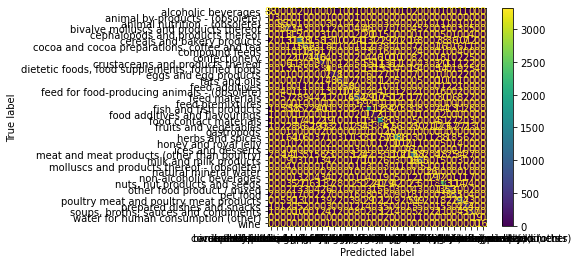

In [14]:
print("specificity: ",clf.score(X_test, y_test))

print("sensitivity: ",recall_score(y_test, y_pred, average='macro'))

print("precision: ",precision_score(y_test, y_pred, average='macro'))

cm= confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_) 
disp.plot() 

# Random Forest

In [15]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


KeyboardInterrupt: 

In [ ]:
clf = RandomForestClassifier(bootstrap = True, max_depth = 110, max_features = 3, min_samples_leaf =  3, min_samples_split = 8, n_estimators =  200)
clf = clf.fit(X_train,y_train)

<ipython-input-25-50ed6adac834>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(X_train,y_train)


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array(['fruits and vegetables', 'fruits and vegetables',
       'fruits and vegetables', ...,
       'dietetic foods, food supplements, fortified foods',
       'dietetic foods, food supplements, fortified foods',
       'dietetic foods, food supplements, fortified foods'], dtype=object)

In [ ]:
print(classification_report(y_test,y_pred))

C:\Users\Enrique\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                   precision    recall  f1-score   support

                              alcoholic beverages       0.00      0.00      0.00        86
                  animal by-products - (obsolete)       0.00      0.00      0.00         7
                    animal nutrition - (obsolete)       0.00      0.00      0.00       128
            bivalve molluscs and products thereof       0.00      0.00      0.00       492
                 cephalopods and products thereof       0.00      0.00      0.00       159
                      cereals and bakery products       1.00      0.02      0.04      1348
     cocoa and cocoa preparations, coffee and tea       0.00      0.00      0.00       615
                                   compound feeds       0.00      0.00      0.00       186
                                    confectionery       0.00      0.00      0.00       576
                 crustaceans and products thereof       0.00      0.00      0.00       51

C:\Users\Enrique\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Enrique\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("specificity: ",clf.score(X_test, y_test))

print("sensitivity: ",recall_score(y_test, y_pred, average='macro'))

print("precision: ",precision_score(y_test, y_pred, average='macro'))

cm= confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_) 
disp.plot() 

0.32816364021762173

# Gaussian naive Bayes clasiffier

In [ ]:
params = {'var_smoothing': np.logspace(0,-9, num=1)}
gs_NB =  GridSearchCV(GaussianNB(), params, verbose=1, cv=3)
gs_NB.fit(X_train.toarray(), y_train)

gs_NB.best_params_

In [ ]:
clf = GaussianNB(var_smoothing = 1.0)
clf = clf.fit(X_train_one_hot.toarray(),y_train)

In [ ]:
y_pred = clf.predict(X_test_one_hot.toarray())

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
clf.score(X_test_one_hot.toarray(), y_test)

# Regresión logística

In [ ]:
clf = LogisticRegression()
grid_values = {'penalty': ['l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, np.ravel(y_train))

In [24]:
grid_clf_acc.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [25]:
clf = LogisticRegression(penalty= 'l2',C=0.001)
clf = clf.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [26]:
y_pred = clf.predict(X_test)

In [27]:
print(classification_report(y_test,y_pred))

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                   precision    recall  f1-score   support

                              alcoholic beverages       0.00      0.00      0.00        83
                  animal by-products - (obsolete)       0.00      0.00      0.00        11
                    animal nutrition - (obsolete)       0.00      0.00      0.00       125
            bivalve molluscs and products thereof       0.00      0.00      0.00       461
                 cephalopods and products thereof       0.00      0.00      0.00       165
                      cereals and bakery products       0.37      0.03      0.06      1429
     cocoa and cocoa preparations, coffee and tea       0.00      0.00      0.00       622
                                   compound feeds       0.00      0.00      0.00       185
                                    confectionery       0.00      0.00      0.00       544
                 crustaceans and products thereof       0.00      0.00      0.00       52

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
clf.score(X_test, y_test)

0.32025012364869637

# Support vector machine

In [30]:
clf = svm.SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
clf = GridSearchCV(clf, param_grid, refit = True, verbose = 3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=12.6min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=13.0min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=13.2min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=13.2min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=13.0min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time= 8.2min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time= 8.0min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=10.5min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time= 7.8min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time= 7.5min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time= 9.0min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time= 9.2min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time= 8.8min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time= 8.7min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time= 9.1min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time= 9.5min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time= 9.2min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time= 9.2min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time= 9.3min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=10.4min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ................C=0.1, gamma=0.0001, kernel=rbf; total time= 9.3min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ................C=0.1, gamma=0.0001, kernel=rbf; total time= 9.0min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ................C=0.1, gamma=0.0001, kernel=rbf; total time= 9.5min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ................C=0.1, gamma=0.0001, kernel=rbf; total time= 9.4min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ................C=0.1, gamma=0.0001, kernel=rbf; total time= 9.2min


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
clf.best_params_

In [ ]:
clf.score(X_test, y_test)

# Boosted Trees

In [11]:
param_grid = {'n_estimators':range(20,81,10),
 'learning_rate':[1, 0.5, 0.25, 0.1, 0.05, 0.01],
  'max_depth':range(5,16,2),
  'min_samples_split':range(200,1001,200)}

In [16]:
clf = GridSearchCV(estimator = GradientBoostingClassifier(max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_grid,n_jobs=4, cv=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

In [ ]:
clf.score(X_test, y_test)

In [ ]:
clf = AdaBoostClassifier()
clf = clf.fit(X_train_one_hot,y_train)
y_pred = clf.predict(X_test_one_hot)
print(classification_report(y_test,y_pred))

In [ ]:
clf.score(X_test_one_hot, y_test)

# Nearest centroid

In [ ]:
clf = NearestCentroid()
clf = clf.fit(X_train_one_hot,y_train)
y_pred = clf.predict(X_test_one_hot)
print(classification_report(y_test,y_pred))

In [ ]:
clf.score(X_test_one_hot, y_test)

# Nearest neighbor

In [ ]:
clf = neighbors.KNeighborsClassifier()
clf = clf.fit(X_train_one_hot,y_train)
y_pred = clf.predict(X_test_one_hot)
print(classification_report(y_test,y_pred))

In [ ]:
clf.score(X_test_one_hot, y_test)

# MLP sin embeddings

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(y_train.values)
Y_train_label = le.transform(y_train.values) 
y_train_one_hot = to_categorical(Y_train_label)
display(y_train_one_hot)

In [ ]:
y_test_label = le.transform(y_test.values) 
y_test_one_hot = to_categorical(y_test_label)
display(y_test_one_hot)

In [ ]:
model = Sequential() 
model.add(Dense(300, activation='relu', input_dim=351))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(38)) 
optimizer = RMSprop(lr=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics= ['accuracy'])

In [ ]:
hist = model.fit(X_train_one_hot,y_train_one_hot, epochs=70,validation_data=(X_test_one_hot, y_test_one_hot), batch_size=120)

In [ ]:
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.show()


plt.plot(hist.history['acc']) 
plt.plot(hist.history['val_acc']) 
plt.show()

## Pruebas grid search

In [ ]:
def create_model(neuronas1 = 25,neuronas2 =25,neuronas3 = 25):
           
    model = Sequential()
    activation='relu'
    init_mode='normal'
    dropout_rate=0.0
    weight_constraint=0
    model.add(Dense(neuronas1, activation=activation, input_dim=374,kernel_initializer=init_mode))
    model.add(Dense(neuronas2, activation=activation,kernel_initializer=init_mode))
    model.add(Dense(neuronas3, activation=activation,kernel_initializer=init_mode))
    model.add(Dropout(dropout_rate))
    model.add(Dense(38,kernel_initializer=init_mode))
    optimizer = RMSprop(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
    return model

seed = 7
np.random.seed(seed)
model = KerasClassifier(build_fn=create_model, verbose=1,batch_size=120, epochs = 70)

In [ ]:
neuronas1 = [25,75,100,150,200,250,300,350,400]
neuronas2 = [25,75,100,150,200,250,300,350,400]
neuronas3 = [25,75,100,150,200,250,300,350,400]
param_grid = dict(neuronas1=neuronas1,neuronas2=neuronas2,neuronas3=neuronas3)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=2)
grid_result = grid.fit(X_train_one_hot, y_train_one_hot)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))